In [1]:
!pip install ultralytics opencv-python pandas numpy torch torchvision tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import os
import cv2
import random
import zipfile
import shutil
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Path to the data.zip file
zip_file_path = "/content/data.zip"
extracted_folder_path = "/content/data"  # Folder to extract the contents

# Extract data.zip if not already extracted
if not os.path.exists(extracted_folder_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder_path)
    print(f"Extracted {zip_file_path} to {extracted_folder_path}")

Extracted /content/data.zip to /content/data


In [4]:
TRAIN_CSV = "/content/Train.csv"
TEST_CSV = "/content/Test.csv"
TRAIN_IMG_DIR = os.path.join(extracted_folder_path, "train")
TEST_IMG_DIR = os.path.join(extracted_folder_path, "test")
YOLO_DATA_DIR = "/content/yolo_dataset/images/train"

In [5]:
import pandas as pd
import os

# Load the CSV file
TRAIN_CSV = "/content/Train.csv"  # Update the path if needed
train_df = pd.read_csv(TRAIN_CSV)

# Define the output directory for FolderName.txt
OUTPUT_DIR = "/content/foldername_texts"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Remove the 'FolderName' column and save the updated CSV
train_df.drop(columns=['FolderName'], inplace=True)

# Save the modified CSV (without FolderName)
MODIFIED_CSV_PATH = os.path.join(OUTPUT_DIR, "Modified_Train.csv")
train_df.to_csv(MODIFIED_CSV_PATH, index=False)

# Save FolderName column separately as FolderName.txt
FOLDERNAME_TXT_PATH = os.path.join(OUTPUT_DIR, "FolderName.txt")
train_df_original = pd.read_csv(TRAIN_CSV)  # Reload original CSV to extract FolderName
foldernames = train_df_original["FolderName"]

# Write folder names to FolderName.txt
with open(FOLDERNAME_TXT_PATH, "w") as f:
    for name in foldernames:
        f.write(name + "\n")

print(f"✅ Modified CSV saved at: {MODIFIED_CSV_PATH}")
print(f"✅ Folder names saved separately at: {FOLDERNAME_TXT_PATH}")


✅ Modified CSV saved at: /content/foldername_texts/Modified_Train.csv
✅ Folder names saved separately at: /content/foldername_texts/FolderName.txt


In [6]:
import os

# Define the file path
FOLDERNAME_TXT_PATH = "/content/foldername_texts/FolderName.txt"

# Check if the file exists
if os.path.exists(FOLDERNAME_TXT_PATH):
    # Open and read the contents of the file
    with open(FOLDERNAME_TXT_PATH, "r") as file:
        contents = file.readlines()  # Read all lines into a list

    # Get the length of the file (number of lines)
    file_length = len(contents)

    # Print the first few lines to verify
    print(f"✅ FolderName.txt contains {file_length} entries.\n")
    print("🔹 First 10 Lines:\n")
    for line in contents[:10]:  # Show only the first 10 lines
        print(line.strip())  # Strip removes extra whitespace
else:
    print("❌ File not found! Check the path and try again.")



✅ FolderName.txt contains 386 entries.

🔹 First 10 Lines:

A6dzrkjqvl
Ypktwvqjbn
Ox18ob0syv
Hqcekwpxgu
Ummqfuetoc
B5myqsh1wi
L8w7zu7wek
Izbgyxre0g
Vinlgebupo
Hc3b9gicdo


In [8]:
# Load the training CSV file
TRAIN_CSV = "/content/Train.csv"  # Replace with actual path to your CSV file
train_df = pd.read_csv(TRAIN_CSV)

# Split dataset into train/val (80/20)
train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)
print(train_df.head(), train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           386 non-null    object 
 1   FolderName   386 non-null    object 
 2   PlantNumber  386 non-null    int64  
 3   Side         386 non-null    object 
 4   Start        386 non-null    int64  
 5   End          386 non-null    int64  
 6   RootVolume   386 non-null    float64
 7   Genotype     386 non-null    object 
 8   Stage        386 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 27.3+ KB
                 ID  FolderName  PlantNumber Side  Start  End  RootVolume  \
0  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
1  ID_718181_Bslpwx  Ypktwvqjbn            7    L     33   41         1.5   
2  ID_465762_L1n61d  Ox18ob0syv            4    R     21   28         2.7   
3  ID_626872_Pbmx2e  Hqcekwpxgu            2    R     30   39  

In [9]:

# Define directories
train_root_dir = "/content/data/train"
dst_images_train = "/content/yolo_dataset/images/train"
dst_images_val = "/content/yolo_dataset/images/val"
dst_labels_train = "/content/yolo_dataset/labels/train"
dst_labels_val = "/content/yolo_dataset/labels/val"
foldername_txt_path = "/content/foldername_texts/FolderName.txt"

# Create destination directories if they don't exist
for directory in [dst_images_train, dst_images_val, dst_labels_train, dst_labels_val]:
    os.makedirs(directory, exist_ok=True)

# ✅ Function to convert bounding boxes to YOLO format
def convert_to_yolo_format(image_width, image_height, bbox):
    """
    Convert bounding box from (x_min, y_min, x_max, y_max) to YOLO format (x_center, y_center, width, height).

    bbox: (x_min, y_min, x_max, y_max) in absolute pixel values.
    """
    x_min, y_min, x_max, y_max = bbox
    x_center = (x_min + x_max) / 2 / image_width
    y_center = (y_min + y_max) / 2 / image_height
    width = (x_max - x_min) / image_width
    height = (y_max - y_min) / image_height

    return f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"

# Collect all image paths
all_images = []
for subfolder in sorted(os.listdir(train_root_dir)):
    subfolder_path = os.path.join(train_root_dir, subfolder)
    if os.path.isdir(subfolder_path):
        for root, _, files in os.walk(subfolder_path):
            for file in sorted(files):
                if file.lower().endswith(".png"):  # Check if it's a .png image
                    all_images.append(os.path.join(root, file))

# ✅ Randomly select 386 images
selected_images = random.sample(all_images, min(386, len(all_images)))

# ✅ Split into 308 train and 78 validation images
train_images = selected_images[:308]
val_images = selected_images[308:]

# Function to copy and rename images
def copy_images(image_list, dst_dir):
    for idx, src_file in enumerate(image_list, start=1):
        new_filename = f"image_{idx:05d}.png"  # Rename sequentially
        dst_file = os.path.join(dst_dir, new_filename)
        shutil.copy(src_file, dst_file)

    print(f"✅ Successfully copied {len(image_list)} images to {dst_dir}")

# Copy images into respective directories
copy_images(train_images, dst_images_train)
copy_images(val_images, dst_images_val)

# ✅ Process FolderName.txt for label assignment
if os.path.exists(foldername_txt_path):
    with open(foldername_txt_path, "r") as file:
        all_labels = file.readlines()

    all_labels = [label.strip() for label in all_labels]  # Clean up labels

    if len(all_labels) >= 386:  # Ensure we have enough labels
        train_labels = all_labels[:308]
        val_labels = all_labels[308:]

        # Function to save labels in YOLO format
        def save_labels(image_list, label_list, dst_dir):
            for idx, (image_path, label) in enumerate(zip(image_list, label_list)):
                label_filename = f"image_{idx+1:05d}.txt"  # Match image filename
                label_path = os.path.join(dst_dir, label_filename)

                # Simulated bounding box (replace with actual detection logic)
                image_width, image_height = 640, 480  # Replace with actual image size
                bbox = (100, 100, 300, 300)  # Replace with actual bbox coordinates

                yolo_label = convert_to_yolo_format(image_width, image_height, bbox)

                with open(label_path, "w") as f:
                    f.write(yolo_label)

            print(f"✅ Successfully saved {len(label_list)} labels to {dst_dir}")

        # Save labels into respective directories
        save_labels(train_images, train_labels, dst_labels_train)
        save_labels(val_images, val_labels, dst_labels_val)
    else:
        print("❌ Not enough labels in FolderName.txt!")
else:
    print("❌ FolderName.txt not found!")

print("🎯 Dataset preparation complete!")


✅ Successfully copied 308 images to /content/yolo_dataset/images/train
✅ Successfully copied 78 images to /content/yolo_dataset/images/val
✅ Successfully saved 308 labels to /content/yolo_dataset/labels/train
✅ Successfully saved 78 labels to /content/yolo_dataset/labels/val
🎯 Dataset preparation complete!


In [10]:
import os

train_label_dir = "/content/yolo_dataset/labels/train"
val_label_dir = "/content/yolo_dataset/labels/val"

train_labels = [f for f in os.listdir(train_label_dir) if f.endswith(".txt")]
val_labels = [f for f in os.listdir(val_label_dir) if f.endswith(".txt")]

print(f"Train labels found: {len(train_labels)}")
print(f"Validation labels found: {len(val_labels)}")


Train labels found: 308
Validation labels found: 78


In [11]:
for label_file in train_labels[:5]:  # Check first 5 label files
    path = os.path.join(train_label_dir, label_file)
    with open(path, "r") as f:
        content = f.read().strip()
        print(f"{label_file}: {content if content else '⚠️ EMPTY FILE'}")


image_00243.txt: 0 0.312500 0.416667 0.312500 0.416667
image_00214.txt: 0 0.312500 0.416667 0.312500 0.416667
image_00240.txt: 0 0.312500 0.416667 0.312500 0.416667
image_00211.txt: 0 0.312500 0.416667 0.312500 0.416667
image_00091.txt: 0 0.312500 0.416667 0.312500 0.416667


In [13]:
with open("/content/yolo_dataset/data.yaml", "r") as f:
    print(f.read())


path: /content/yolo_dataset
train: images/train
val: images/val
nc: 1
names: ["root"]




In [14]:
!rm /content/yolo_dataset/labels/train.cache
!rm /content/yolo_dataset/labels/val.cache


rm: cannot remove '/content/yolo_dataset/labels/train.cache': No such file or directory
rm: cannot remove '/content/yolo_dataset/labels/val.cache': No such file or directory


In [12]:

# Create data.yaml for YOLOv8
data_yaml_content = """path: /content/yolo_dataset
train: images/train
val: images/val
nc: 1
names: ["root"]

"""

yaml_path = "/content/yolo_dataset/data.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

print(f"✅ Created {yaml_path}")



✅ Created /content/yolo_dataset/data.yaml


In [15]:

model = YOLO("yolov8n.pt")
model.train(data="yolo_dataset/data.yaml", epochs=50, imgsz=640, batch=16, lr0=0.001)


100%|██████████| 6.25M/6.25M [00:00<00:00, 309MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 77.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 221MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_dataset/labels/train... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<00:00, 2319.34it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_dataset/labels/val... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<00:00, 1596.01it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.23G      5.494      12.43      4.539          8        640: 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         78         78          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G      3.457      4.707      1.983         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]

                   all         78         78     0.0044      0.295    0.00289   0.000625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      2.958      4.014      1.893          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         78         78   0.000272     0.0256   0.000145   1.45e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      3.126      3.622       1.82          6        640: 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]

                   all         78         78    0.00212      0.218     0.0016   0.000238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G      2.946      3.343      1.862         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         78         78    0.00805      0.936     0.0549     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G      3.004      3.495      1.837          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         78         78    0.00434      0.474     0.0141     0.0022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      2.932      3.121      1.833          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         78         78     0.0107          1        0.1     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G      2.855      2.984      1.726         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         78         78     0.0107      0.974     0.0449     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      2.787      2.984      1.743         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         78         78    0.00668      0.513     0.0235    0.00393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      2.717      2.799      1.684          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]

                   all         78         78     0.0143          1     0.0749     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G       2.61       2.76      1.713          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         78         78    0.00976      0.987      0.041     0.0099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G       2.67      2.702      1.697         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]

                   all         78         78     0.0115          1      0.138     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G      2.573      2.653      1.689         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         78         78     0.0181          1        0.1       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      2.556      2.585       1.74          9        640: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         78         78     0.0197          1     0.0685     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G      2.495      2.533      1.737         14        640: 100%|██████████| 20/20 [00:04<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         78         78     0.0209          1     0.0958     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G       2.37      2.444      1.692          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         78         78     0.0166      0.808     0.0162    0.00374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G      2.385      2.496      1.702         11        640: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         78         78     0.0194          1     0.0772     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.18G      2.439      2.454      1.687          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         78         78     0.0217          1     0.0864     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.18G      2.339      2.343      1.659          7        640: 100%|██████████| 20/20 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         78         78      0.021      0.936      0.141     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G      2.398      2.353      1.634         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]

                   all         78         78     0.0202          1       0.13     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.18G      2.213      2.356      1.658         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]

                   all         78         78     0.0161      0.974      0.139     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.18G      2.297      2.382      1.594         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         78         78     0.0219          1      0.287     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G      2.247      2.307      1.647         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]

                   all         78         78     0.0229          1       0.26     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G      2.418       2.33      1.667          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         78         78     0.0141          1      0.213     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.18G      2.288      2.286      1.671         10        640: 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]

                   all         78         78     0.0151      0.974      0.177     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.18G      2.205      2.239      1.652         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all         78         78     0.0174          1      0.161     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G      2.117      2.262      1.637          8        640: 100%|██████████| 20/20 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.55it/s]

                   all         78         78     0.0228          1      0.176     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G      2.137      2.216      1.594         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         78         78     0.0268          1      0.145     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G      2.113      2.241      1.564         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         78         78     0.0255          1      0.171     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G      2.119      2.249      1.622          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         78         78     0.0192          1      0.143     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G      2.196      2.202      1.589          6        640: 100%|██████████| 20/20 [00:04<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]

                   all         78         78      0.023          1      0.129     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      2.074      2.163      1.601         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         78         78     0.0178          1      0.131     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G      2.021      2.188      1.596          6        640: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]

                   all         78         78     0.0174          1       0.12     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G       2.12      2.181      1.607         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         78         78     0.0205          1      0.146     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G      2.026       2.18      1.573         12        640: 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         78         78     0.0758      0.987      0.142     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G      1.971      2.163      1.584          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         78         78     0.0751      0.962      0.123     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.957      2.166      1.608         10        640: 100%|██████████| 20/20 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all         78         78     0.0614          1      0.131      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G      1.984      2.158       1.59          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         78         78     0.0198          1      0.126     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G      1.987      2.123       1.56         10        640: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         78         78     0.0212          1     0.0993     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.18G      1.925       2.16      1.558          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         78         78     0.0221          1      0.115     0.0329


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G      2.662      2.939      1.748          3        640: 100%|██████████| 20/20 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         78         78     0.0198          1      0.176     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G      2.323      2.284      1.609          4        640: 100%|██████████| 20/20 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]

                   all         78         78     0.0181          1      0.129     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G      2.031      2.236      1.579          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         78         78     0.0172          1      0.106     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G      1.887      2.197       1.58          4        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         78         78     0.0187          1     0.0958     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G       1.82      2.142       1.53          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all         78         78     0.0232      0.987     0.0963      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G      1.884      2.068      1.495          4        640: 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         78         78     0.0315          1      0.163     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.17G      1.765      2.044      1.508          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]

                   all         78         78     0.0356          1      0.104      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G      1.723      2.052      1.482          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         78         78     0.0346          1     0.0976     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G       1.67      2.007      1.486          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         78         78     0.0356          1     0.0938     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G       1.65      2.047      1.506          4        640: 100%|██████████| 20/20 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]

                   all         78         78     0.0363          1      0.095     0.0325



50 epochs completed in 0.090 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]


                   all         78         78     0.0228          1      0.262     0.0882
Speed: 0.0ms preprocess, 1.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db634d55050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
# Load best trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Evaluate model performance
metrics = model.val()
print(metrics)


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/yolo_dataset/labels/val.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.17it/s]


                   all         78         78     0.0228          1      0.258      0.084
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db714ff1390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [18]:
import os

TEST_IMG_DIR = "/content/data/test"  # Update this if needed

# List all test images
test_images = os.listdir(TEST_IMG_DIR)
print("Test Images:", test_images)


Test Images: ['E1rmdjjang', 'Wgutyon8uu', 'V6awcupt6m', 'Yjzw2bylox', 'Yvlyjpumzl', 'Lnkljfdtgh', 'Q91mym9ev4', 'Izbgyxre0g', 'Qinorm9cg3', 'A6dzrkjqvl', 'Pucqtyga9u', 'Ummqfuetoc', 'Geksu5kuf3', 'B8x7mhxe6z', 'Lwuwokuhrf', 'Ubgsvkns3h', 'Sauopakhvn', 'Ifqbqqrika', 'B5myqsh1wi', 'Vwjlghaocq', 'Hqcekwpxgu', 'Dz9lpsl9ae', 'Ecxdebmlnr', 'Dhfwcg1uj2', 'S6lk1xauct', 'Mylwjeq6tq', 'Nrse2plksd', 'Hzapvbcfm8', 'Lzkaccojep', 'L5l1h3kekg', 'Pfp24vx905', 'Vlqr6qhbqk', 'Mskdmpitqk', 'Bb02c5k7wm', 'Hc3b9gicdo', 'Mpmvh2mgm3', 'Vbkivqphuz', 'Klhqlr0ako', 'Cex3glsnzv', 'Jrem9eo37e', 'Ah4ubi4ggi', 'Ox18ob0syv', 'Puya1uaaln', 'Pctl4tyb9l', 'Qhqftdiz4q', 'Oipmzygepq', 'F5lrpuuq8q', 'Yxmmb4wt55', 'Vlcavd4dwj', 'L6qdyaff5q', 'R9jmsmugc0', 'Lsdgz02kdp', 'S11rphogci', 'Vwsx0beaxb', 'Jtcfkuovxk', 'Kcqzgef5an', 'Mrw7chmalv', 'L8w7zu7wek', 'Eotyv55rer', 'Q4uyruus4j', 'Me1ufzzcxk', 'H9lomh5fxk']


In [19]:
import os

TEST_IMG_DIR = "/content/data/test"  # Update if needed

# Check if entries are files or directories
for entry in os.listdir(TEST_IMG_DIR):
    entry_path = os.path.join(TEST_IMG_DIR, entry)
    if os.path.isdir(entry_path):
        print(f"📂 '{entry}' is a folder")
    else:
        print(f"🖼️ '{entry}' is an image")


📂 'E1rmdjjang' is a folder
📂 'Wgutyon8uu' is a folder
📂 'V6awcupt6m' is a folder
📂 'Yjzw2bylox' is a folder
📂 'Yvlyjpumzl' is a folder
📂 'Lnkljfdtgh' is a folder
📂 'Q91mym9ev4' is a folder
📂 'Izbgyxre0g' is a folder
📂 'Qinorm9cg3' is a folder
📂 'A6dzrkjqvl' is a folder
📂 'Pucqtyga9u' is a folder
📂 'Ummqfuetoc' is a folder
📂 'Geksu5kuf3' is a folder
📂 'B8x7mhxe6z' is a folder
📂 'Lwuwokuhrf' is a folder
📂 'Ubgsvkns3h' is a folder
📂 'Sauopakhvn' is a folder
📂 'Ifqbqqrika' is a folder
📂 'B5myqsh1wi' is a folder
📂 'Vwjlghaocq' is a folder
📂 'Hqcekwpxgu' is a folder
📂 'Dz9lpsl9ae' is a folder
📂 'Ecxdebmlnr' is a folder
📂 'Dhfwcg1uj2' is a folder
📂 'S6lk1xauct' is a folder
📂 'Mylwjeq6tq' is a folder
📂 'Nrse2plksd' is a folder
📂 'Hzapvbcfm8' is a folder
📂 'Lzkaccojep' is a folder
📂 'L5l1h3kekg' is a folder
📂 'Pfp24vx905' is a folder
📂 'Vlqr6qhbqk' is a folder
📂 'Mskdmpitqk' is a folder
📂 'Bb02c5k7wm' is a folder
📂 'Hc3b9gicdo' is a folder
📂 'Mpmvh2mgm3' is a folder
📂 'Vbkivqphuz' is a folder
📂

In [20]:
all_test_images = []

for folder in os.listdir(TEST_IMG_DIR):
    folder_path = os.path.join(TEST_IMG_DIR, folder)
    if os.path.isdir(folder_path):  # If it's a folder
        images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith((".png", ".jpg", ".jpeg"))]
        all_test_images.extend(images)

print(f"Found {len(all_test_images)} test images.")
print("Example image path:", all_test_images[0] if all_test_images else "No images found!")


Found 10168 test images.
Example image path: /content/data/test/E1rmdjjang/E1rmdjjang_R_014.png


In [21]:

# Set the number of test images you need
NUM_TEST_IMAGES = 386

# Ensure we don't select more images than available
selected_test_images = random.sample(all_test_images, min(NUM_TEST_IMAGES, len(all_test_images)))

# Define the output directory for selected test images
SELECTED_TEST_DIR = "/content/data/selected_test"
os.makedirs(SELECTED_TEST_DIR, exist_ok=True)

# Copy selected images to the new folder
for img_path in selected_test_images:
    shutil.copy(img_path, os.path.join(SELECTED_TEST_DIR, os.path.basename(img_path)))

print(f"✅ Selected {len(selected_test_images)} test images.")
print(f"🛠️ Images copied to: {SELECTED_TEST_DIR}")
print("Example selected image:", selected_test_images[0])


✅ Selected 386 test images.
🛠️ Images copied to: /content/data/selected_test
Example selected image: /content/data/test/Cex3glsnzv/Cex3glsnzv_R_029.png



image 1/1 /content/data/selected_test/A6dzrkjqvl_L_004.png: 32x640 (no detections), 45.9ms
Speed: 0.7ms preprocess, 45.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


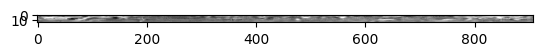

In [22]:
def segment_image(img_path):
    results = model(img_path)
    segmented_img = results[0].plot()
    return segmented_img

# Example on a test image
sample_img_path = os.path.join(SELECTED_TEST_DIR, "A6dzrkjqvl_L_004.png")
seg_img = segment_image(sample_img_path)

plt.imshow(seg_img)
plt.show()

In [23]:
def extract_features(df, img_dir):
    features = []
    for _, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(img_dir, row['FolderName'], f"{row['FolderName']}_{row['Side']}_{str(row['Start']).zfill(3)}.png")
        results = model(img_path)
        num_roots = len(results[0].boxes)  # Number of detected root bounding boxes
        features.append([row['ID'], num_roots])

    return pd.DataFrame(features, columns=['ID', 'RootCount'])

# Extract features from training data
train_features = extract_features(train_df, TRAIN_IMG_DIR)
train_data = train_df.merge(train_features, on="ID")

# Train a regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = train_data[['RootCount']]
y = train_data['RootVolume']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_train, y_train)

# Validate Model
y_pred = model_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")


  0%|          | 0/386 [00:00<?, ?it/s]


image 1/1 /content/data/train/A6dzrkjqvl/A6dzrkjqvl_L_033.png: 32x640 (no detections), 11.5ms
Speed: 0.9ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ypktwvqjbn/Ypktwvqjbn_L_033.png: 32x640 (no detections), 7.8ms
Speed: 0.7ms preprocess, 7.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ox18ob0syv/Ox18ob0syv_R_021.png: 32x640 (no detections), 6.6ms
Speed: 0.5ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hqcekwpxgu/Hqcekwpxgu_R_030.png: 32x640 (no detections), 6.4ms
Speed: 0.5ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Ummqfuetoc_R_017.png: 32x640 (no detections), 6.3ms
Speed: 1.7ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/B5myqsh1wi/B5myqsh1wi_

  2%|▏         | 6/386 [00:00<00:06, 58.65it/s]


image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_R_027.png: 32x640 (no detections), 6.6ms
Speed: 0.7ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_L_024.png: 32x640 (no detections), 6.7ms
Speed: 0.8ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vinlgebupo/Vinlgebupo_L_023.png: 32x640 (no detections), 6.2ms
Speed: 1.4ms preprocess, 6.2ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hc3b9gicdo/Hc3b9gicdo_L_037.png: 32x640 (no detections), 6.0ms
Speed: 0.4ms preprocess, 6.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lzkaccojep/Lzkaccojep_L_024.png: 32x640 (no detections), 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_R_

  3%|▎         | 13/386 [00:00<00:06, 62.03it/s]


image 1/1 /content/data/train/Sauopakhvn/Sauopakhvn_R_021.png: 32x640 (no detections), 7.2ms
Speed: 0.5ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_L_032.png: 32x640 (no detections), 7.0ms
Speed: 0.4ms preprocess, 7.0ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/B8x7mhxe6z/B8x7mhxe6z_R_020.png: 32x640 (no detections), 10.9ms
Speed: 0.9ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_R_026.png: 32x640 (no detections), 9.9ms
Speed: 0.7ms preprocess, 9.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ntqusw7xpb/Ntqusw7xpb_R_037.png: 32x640 (no detections), 9.6ms
Speed: 0.5ms preprocess, 9.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ecxdebmlnr/Ecxdebmlnr_

  5%|▌         | 20/386 [00:00<00:06, 57.82it/s]


image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_R_027.png: 32x640 (no detections), 9.5ms
Speed: 0.6ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ph2ti2sjzu/Ph2ti2sjzu_L_022.png: 32x640 (no detections), 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_R_032.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Idiolerx47/Idiolerx47_L_010.png: 32x640 (no detections), 13.4ms
Speed: 0.5ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_L_025.png: 32x640 (no detections), 8.5ms
Speed: 0.5ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Gernxgxbnu/Gernxgxbn

  7%|▋         | 26/386 [00:00<00:06, 55.09it/s]


image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_L_029.png: 32x640 (no detections), 10.6ms
Speed: 0.5ms preprocess, 10.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_L_032.png: 32x640 (no detections), 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xrrcqvdbkw/Xrrcqvdbkw_R_027.png: 32x640 (no detections), 9.7ms
Speed: 0.5ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zplb9xaxis/Zplb9xaxis_L_019.png: 32x640 (no detections), 9.9ms
Speed: 0.5ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_L_037.png: 32x640 (no detections), 11.1ms
Speed: 0.5ms preprocess, 11.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlcavd4dwj/Vlcavd4dw

  8%|▊         | 32/386 [00:00<00:06, 52.97it/s]


image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_L_026.png: 32x640 (no detections), 13.6ms
Speed: 0.6ms preprocess, 13.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_R_049.png: 32x640 (no detections), 12.1ms
Speed: 0.6ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_R_049.png: 32x640 (no detections), 11.3ms
Speed: 0.7ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_L_025.png: 32x640 (no detections), 11.2ms
Speed: 0.8ms preprocess, 11.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_L_042.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xdi1ipcemf/Xdi

 10%|▉         | 38/386 [00:00<00:06, 50.49it/s]


image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_L_030.png: 32x640 (no detections), 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pctl4tyb9l/Pctl4tyb9l_L_046.png: 32x640 (no detections), 11.2ms
Speed: 0.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ubgsvkns3h/Ubgsvkns3h_L_033.png: 32x640 (no detections), 10.1ms
Speed: 0.7ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Wgutyon8uu/Wgutyon8uu_R_023.png: 32x640 (no detections), 11.2ms
Speed: 0.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_L_032.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Umm

 11%|█▏        | 44/386 [00:00<00:06, 50.31it/s]


image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_R_027.png: 32x640 (no detections), 11.5ms
Speed: 0.6ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_R_027.png: 32x640 (no detections), 14.1ms
Speed: 0.6ms preprocess, 14.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Me1ufzzcxk/Me1ufzzcxk_R_023.png: 32x640 (no detections), 12.2ms
Speed: 0.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_L_042.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mylwjeq6tq/Mylwjeq6tq_R_019.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifq

 13%|█▎        | 50/386 [00:00<00:06, 48.96it/s]


image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_R_045.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qinorm9cg3/Qinorm9cg3_R_022.png: 32x640 (no detections), 10.4ms
Speed: 0.5ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vbkivqphuz/Vbkivqphuz_L_020.png: 32x640 (no detections), 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_R_016.png: 32x640 (no detections), 11.8ms
Speed: 0.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_R_020.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 14%|█▍        | 55/386 [00:01<00:06, 48.97it/s]


image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_R_017.png: 32x640 (no detections), 12.7ms
Speed: 0.7ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_L_037.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L5l1h3kekg/L5l1h3kekg_L_038.png: 32x640 (no detections), 10.2ms
Speed: 0.6ms preprocess, 10.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_L_030.png: 32x640 (no detections), 9.7ms
Speed: 1.1ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_R_016.png: 32x640 (no detections), 8.2ms
Speed: 0.5ms preprocess, 8.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 16%|█▌        | 60/386 [00:01<00:06, 48.85it/s]


image 1/1 /content/data/train/P3om3dfa78/P3om3dfa78_R_021.png: 32x640 (no detections), 6.8ms
Speed: 0.5ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ot13d4nq6t/Ot13d4nq6t_L_041.png: 32x640 (no detections), 7.0ms
Speed: 0.5ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jtcfkuovxk/Jtcfkuovxk_R_028.png: 32x640 (no detections), 7.5ms
Speed: 0.6ms preprocess, 7.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vinlgebupo/Vinlgebupo_L_023.png: 32x640 (no detections), 8.2ms
Speed: 0.6ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F3odypnsyf/F3odypnsyf_L_015.png: 32x640 (no detections), 10.5ms
Speed: 0.5ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Wgutyon8uu/Wgutyon8uu_

 17%|█▋        | 67/386 [00:01<00:06, 52.05it/s]


image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_R_024.png: 32x640 (no detections), 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vbkivqphuz/Vbkivqphuz_R_030.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/H9lomh5fxk/H9lomh5fxk_L_040.png: 32x640 (no detections), 9.9ms
Speed: 0.5ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_L_033.png: 32x640 (no detections), 11.5ms
Speed: 0.7ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_L_021.png: 32x640 (no detections), 11.1ms
Speed: 0.9ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Isdzz86frg/Isdzz

 19%|█▉        | 73/386 [00:01<00:06, 51.40it/s]


image 1/1 /content/data/train/S6lk1xauct/S6lk1xauct_L_028.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_L_029.png: 32x640 (no detections), 9.0ms
Speed: 0.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_R_037.png: 32x640 (no detections), 9.2ms
Speed: 0.8ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_R_028.png: 32x640 (no detections), 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yjzw2bylox/Yjzw2bylox_L_025.png: 32x640 (no detections), 8.9ms
Speed: 0.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_

 20%|██        | 79/386 [00:01<00:06, 50.81it/s]


image 1/1 /content/data/train/Xydfltswbm/Xydfltswbm_L_043.png: 32x640 (no detections), 13.4ms
Speed: 0.7ms preprocess, 13.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_R_037.png: 32x640 (no detections), 7.1ms
Speed: 0.5ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_R_027.png: 32x640 (no detections), 7.4ms
Speed: 0.5ms preprocess, 7.4ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_R_026.png: 32x640 (no detections), 8.2ms
Speed: 0.5ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_L_032.png: 32x640 (no detections), 7.4ms
Speed: 0.5ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lwuwokuhrf/Lwuwokuhrf_

 22%|██▏       | 85/386 [00:01<00:05, 53.16it/s]


image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_L_022.png: 32x640 (no detections), 12.9ms
Speed: 0.6ms preprocess, 12.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Miny0c252a/Miny0c252a_R_028.png: 32x640 (no detections), 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_R_024.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Toaefqwoli/Toaefqwoli_L_037.png: 32x640 (no detections), 6.8ms
Speed: 0.5ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_L_026.png: 32x640 (no detections), 10.1ms
Speed: 0.4ms preprocess, 10.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8

 24%|██▎       | 91/386 [00:01<00:05, 53.87it/s]


image 1/1 /content/data/train/Vlcavd4dwj/Vlcavd4dwj_L_034.png: 32x640 (no detections), 7.7ms
Speed: 0.5ms preprocess, 7.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Cex3glsnzv/Cex3glsnzv_L_040.png: 32x640 (no detections), 6.9ms
Speed: 0.5ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_L_048.png: 32x640 (no detections), 7.5ms
Speed: 0.6ms preprocess, 7.5ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S6lk1xauct/S6lk1xauct_L_028.png: 32x640 (no detections), 10.6ms
Speed: 0.4ms preprocess, 10.6ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q91mym9ev4/Q91mym9ev4_R_022.png: 32x640 (no detections), 6.8ms
Speed: 0.4ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_

 25%|██▌       | 98/386 [00:01<00:05, 56.37it/s]


image 1/1 /content/data/train/S6lk1xauct/S6lk1xauct_R_024.png: 32x640 (no detections), 8.7ms
Speed: 0.5ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dhfwcg1uj2/Dhfwcg1uj2_R_020.png: 32x640 (no detections), 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_L_032.png: 32x640 (no detections), 9.2ms
Speed: 0.4ms preprocess, 9.2ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ecxdebmlnr/Ecxdebmlnr_R_025.png: 32x640 (no detections), 6.7ms
Speed: 0.4ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_R_022.png: 32x640 (no detections), 7.1ms
Speed: 0.3ms preprocess, 7.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ph2ti2sjzu/Ph2ti2sjzu_L_

 27%|██▋       | 105/386 [00:01<00:04, 57.61it/s]


image 1/1 /content/data/train/Xydfltswbm/Xydfltswbm_L_043.png: 32x640 (no detections), 7.2ms
Speed: 0.5ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xrrcqvdbkw/Xrrcqvdbkw_R_027.png: 32x640 (no detections), 7.1ms
Speed: 0.6ms preprocess, 7.1ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_R_027.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_L_033.png: 32x640 (no detections), 17.4ms
Speed: 1.6ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F5lrpuuq8q/F5lrpuuq8q_R_023.png: 32x640 (no detections), 13.4ms
Speed: 0.5ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dhfwcg1uj2/Dhfwcg1uj

 29%|██▉       | 111/386 [00:02<00:04, 55.47it/s]


image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_R_038.png: 32x640 (no detections), 10.7ms
Speed: 0.4ms preprocess, 10.7ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Klhqlr0ako/Klhqlr0ako_L_038.png: 32x640 (no detections), 12.0ms
Speed: 0.5ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lwuwokuhrf/Lwuwokuhrf_L_025.png: 32x640 (no detections), 12.2ms
Speed: 0.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S6lk1xauct/S6lk1xauct_R_024.png: 32x640 (no detections), 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_R_037.png: 32x640 (no detections), 12.0ms
Speed: 0.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kcqzgef5an/Kcq

 30%|███       | 117/386 [00:02<00:05, 53.02it/s]


image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_R_026.png: 32x640 (no detections), 9.1ms
Speed: 0.5ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/A6dzrkjqvl/A6dzrkjqvl_L_033.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jtcfkuovxk/Jtcfkuovxk_L_018.png: 32x640 (no detections), 12.8ms
Speed: 0.6ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_R_024.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_L_019.png: 32x640 (no detections), 13.2ms
Speed: 0.5ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Ummqf

 32%|███▏      | 123/386 [00:02<00:05, 49.76it/s]


image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_L_034.png: 32x640 (no detections), 13.0ms
Speed: 0.6ms preprocess, 13.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ceibvxd51g/Ceibvxd51g_R_037.png: 32x640 (no detections), 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ot13d4nq6t/Ot13d4nq6t_L_041.png: 32x640 (no detections), 12.8ms
Speed: 0.5ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jtcfkuovxk/Jtcfkuovxk_L_018.png: 32x640 (no detections), 15.0ms
Speed: 0.5ms preprocess, 15.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_L_030.png: 32x640 (no detections), 18.6ms
Speed: 0.7ms preprocess, 18.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4

 33%|███▎      | 129/386 [00:02<00:05, 45.67it/s]


image 1/1 /content/data/train/Xdi1ipcemf/Xdi1ipcemf_L_021.png: 32x640 (no detections), 13.7ms
Speed: 0.8ms preprocess, 13.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bs8ueatyis/Bs8ueatyis_L_033.png: 32x640 (no detections), 20.0ms
Speed: 0.5ms preprocess, 20.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F1p0lhe1ij/F1p0lhe1ij_R_030.png: 32x640 (no detections), 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bs8ueatyis/Bs8ueatyis_L_033.png: 32x640 (no detections), 16.6ms
Speed: 0.8ms preprocess, 16.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_L_029.png: 32x640 (no detections), 11.0ms
Speed: 0.6ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 35%|███▍      | 134/386 [00:02<00:05, 43.23it/s]


image 1/1 /content/data/train/B5myqsh1wi/B5myqsh1wi_R_026.png: 32x640 (no detections), 13.7ms
Speed: 0.5ms preprocess, 13.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hc3b9gicdo/Hc3b9gicdo_R_029.png: 32x640 (no detections), 19.1ms
Speed: 1.0ms preprocess, 19.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/B8x7mhxe6z/B8x7mhxe6z_R_020.png: 32x640 (no detections), 11.9ms
Speed: 0.5ms preprocess, 11.9ms inference, 2.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mrw7chmalv/Mrw7chmalv_L_018.png: 32x640 (no detections), 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_R_025.png: 32x640 (no detections), 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 3.5ms postprocess per image at shape (1, 3, 32, 640)


 36%|███▌      | 139/386 [00:02<00:05, 41.99it/s]


image 1/1 /content/data/train/Ceibvxd51g/Ceibvxd51g_R_037.png: 32x640 (no detections), 12.9ms
Speed: 0.5ms preprocess, 12.9ms inference, 2.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_L_042.png: 32x640 (no detections), 10.1ms
Speed: 1.3ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_L_021.png: 32x640 (no detections), 14.2ms
Speed: 0.5ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ceibvxd51g/Ceibvxd51g_R_037.png: 32x640 (no detections), 9.7ms
Speed: 0.5ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Td901zykbu/Td901zykbu_L_008.png: 32x640 (no detections), 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 37%|███▋      | 144/386 [00:02<00:05, 41.37it/s]


image 1/1 /content/data/train/Mrw7chmalv/Mrw7chmalv_L_018.png: 32x640 (no detections), 16.8ms
Speed: 0.5ms preprocess, 16.8ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_R_045.png: 32x640 (no detections), 12.9ms
Speed: 0.6ms preprocess, 12.9ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ynjc34lyjb/Ynjc34lyjb_L_010.png: 32x640 (no detections), 9.7ms
Speed: 0.5ms preprocess, 9.7ms inference, 4.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_R_017.png: 32x640 (no detections), 13.0ms
Speed: 0.5ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_L_024.png: 32x640 (no detections), 12.5ms
Speed: 0.4ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 39%|███▊      | 149/386 [00:03<00:05, 40.08it/s]


image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_L_033.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 4.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yxmmb4wt55/Yxmmb4wt55_R_017.png: 32x640 (no detections), 14.8ms
Speed: 0.4ms preprocess, 14.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_L_048.png: 32x640 (no detections), 12.8ms
Speed: 0.6ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mrw7chmalv/Mrw7chmalv_R_030.png: 32x640 (no detections), 10.7ms
Speed: 0.4ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_R_025.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 40%|███▉      | 154/386 [00:03<00:05, 39.83it/s]


image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_R_024.png: 32x640 (no detections), 13.7ms
Speed: 0.6ms preprocess, 13.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_L_032.png: 32x640 (no detections), 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ox18ob0syv/Ox18ob0syv_L_025.png: 32x640 (no detections), 9.2ms
Speed: 0.5ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_L_029.png: 32x640 (no detections), 10.4ms
Speed: 0.4ms preprocess, 10.4ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Ummqfuetoc_L_025.png: 32x640 (no detections), 13.2ms
Speed: 0.6ms preprocess, 13.2ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 41%|████      | 159/386 [00:03<00:05, 41.70it/s]


image 1/1 /content/data/train/Efaiye0hmy/Efaiye0hmy_R_020.png: 32x640 (no detections), 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Oipmzygepq/Oipmzygepq_R_032.png: 32x640 (no detections), 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ntqusw7xpb/Ntqusw7xpb_L_019.png: 32x640 (no detections), 12.6ms
Speed: 0.7ms preprocess, 12.6ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_L_028.png: 32x640 (no detections), 12.0ms
Speed: 0.7ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_R_025.png: 32x640 (no detections), 12.1ms
Speed: 0.7ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)


 42%|████▏     | 164/386 [00:03<00:05, 42.46it/s]


image 1/1 /content/data/train/Geksu5kuf3/Geksu5kuf3_R_035.png: 32x640 (no detections), 13.2ms
Speed: 0.5ms preprocess, 13.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/P3om3dfa78/P3om3dfa78_R_021.png: 32x640 (no detections), 13.6ms
Speed: 0.5ms preprocess, 13.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_L_020.png: 32x640 (no detections), 13.2ms
Speed: 0.6ms preprocess, 13.2ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_L_024.png: 32x640 (no detections), 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vwsx0beaxb/Vwsx0beaxb_R_019.png: 32x640 (no detections), 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 44%|████▍     | 169/386 [00:03<00:05, 43.10it/s]


image 1/1 /content/data/train/M4stkh3qez/M4stkh3qez_R_026.png: 32x640 (no detections), 12.6ms
Speed: 0.6ms preprocess, 12.6ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ubgsvkns3h/Ubgsvkns3h_L_033.png: 32x640 (no detections), 13.5ms
Speed: 0.4ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Geksu5kuf3/Geksu5kuf3_R_035.png: 32x640 (no detections), 16.7ms
Speed: 0.5ms preprocess, 16.7ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xdi1ipcemf/Xdi1ipcemf_R_032.png: 32x640 (no detections), 13.7ms
Speed: 3.7ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vwsx0beaxb/Vwsx0beaxb_L_027.png: 32x640 (no detections), 16.5ms
Speed: 1.1ms preprocess, 16.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 45%|████▌     | 174/386 [00:03<00:05, 40.91it/s]


image 1/1 /content/data/train/Ph2ti2sjzu/Ph2ti2sjzu_L_022.png: 32x640 (no detections), 21.3ms
Speed: 0.6ms preprocess, 21.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_L_029.png: 32x640 (no detections), 16.3ms
Speed: 1.3ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_R_016.png: 32x640 (no detections), 13.2ms
Speed: 0.5ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ypktwvqjbn/Ypktwvqjbn_L_033.png: 32x640 (no detections), 16.9ms
Speed: 0.5ms preprocess, 16.9ms inference, 2.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pfp24vx905/Pfp24vx905_R_027.png: 32x640 (no detections), 16.1ms
Speed: 0.5ms preprocess, 16.1ms inference, 3.9ms postprocess per image at shape (1, 3, 32, 640)


 46%|████▋     | 179/386 [00:03<00:05, 38.34it/s]


image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_L_028.png: 32x640 (no detections), 13.3ms
Speed: 0.5ms preprocess, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Ummqfuetoc_R_017.png: 32x640 (no detections), 12.9ms
Speed: 0.5ms preprocess, 12.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_L_048.png: 32x640 (no detections), 17.5ms
Speed: 0.5ms preprocess, 17.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_R_027.png: 32x640 (no detections), 16.4ms
Speed: 0.4ms preprocess, 16.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 47%|████▋     | 183/386 [00:03<00:05, 37.81it/s]


image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_L_030.png: 32x640 (no detections), 19.4ms
Speed: 0.5ms preprocess, 19.4ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yxmmb4wt55/Yxmmb4wt55_R_017.png: 32x640 (no detections), 14.0ms
Speed: 0.5ms preprocess, 14.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_R_045.png: 32x640 (no detections), 13.0ms
Speed: 0.4ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L5l1h3kekg/L5l1h3kekg_R_040.png: 32x640 (no detections), 19.4ms
Speed: 0.4ms preprocess, 19.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 48%|████▊     | 187/386 [00:03<00:05, 36.91it/s]


image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_L_026.png: 32x640 (no detections), 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Miny0c252a/Miny0c252a_R_028.png: 32x640 (no detections), 11.9ms
Speed: 1.2ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_R_017.png: 32x640 (no detections), 16.1ms
Speed: 1.1ms preprocess, 16.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F1p0lhe1ij/F1p0lhe1ij_R_030.png: 32x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 49%|████▉     | 191/386 [00:04<00:05, 37.02it/s]


image 1/1 /content/data/train/F5lrpuuq8q/F5lrpuuq8q_R_023.png: 32x640 (no detections), 10.0ms
Speed: 0.5ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xrrcqvdbkw/Xrrcqvdbkw_R_027.png: 32x640 (no detections), 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F5lrpuuq8q/F5lrpuuq8q_R_023.png: 32x640 (no detections), 12.6ms
Speed: 0.6ms preprocess, 12.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dhfwcg1uj2/Dhfwcg1uj2_L_020.png: 32x640 (no detections), 12.0ms
Speed: 0.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ubgsvkns3h/Ubgsvkns3h_R_017.png: 32x640 (no detections), 12.3ms
Speed: 0.5ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 51%|█████     | 196/386 [00:04<00:04, 38.86it/s]


image 1/1 /content/data/train/J0zdanvgrq/J0zdanvgrq_L_010.png: 32x640 (no detections), 11.6ms
Speed: 0.8ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Cex3glsnzv/Cex3glsnzv_L_040.png: 32x640 (no detections), 11.7ms
Speed: 0.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_R_025.png: 32x640 (no detections), 11.6ms
Speed: 1.3ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_L_022.png: 32x640 (no detections), 10.3ms
Speed: 0.6ms preprocess, 10.3ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_R_027.png: 32x640 (no detections), 14.6ms
Speed: 0.4ms preprocess, 14.6ms inference, 3.3ms postprocess per image at shape (1, 3, 32, 640)


 52%|█████▏    | 201/386 [00:04<00:04, 39.82it/s]


image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_R_017.png: 32x640 (no detections), 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bb02c5k7wm/Bb02c5k7wm_L_022.png: 32x640 (no detections), 13.0ms
Speed: 0.8ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_L_034.png: 32x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 4.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xdi1ipcemf/Xdi1ipcemf_L_021.png: 32x640 (no detections), 11.6ms
Speed: 0.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 53%|█████▎    | 205/386 [00:04<00:04, 39.31it/s]


image 1/1 /content/data/train/H9lomh5fxk/H9lomh5fxk_L_040.png: 32x640 (no detections), 10.0ms
Speed: 0.4ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Efaiye0hmy/Efaiye0hmy_R_020.png: 32x640 (no detections), 13.4ms
Speed: 0.5ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Toaefqwoli/Toaefqwoli_L_037.png: 32x640 (no detections), 12.3ms
Speed: 0.4ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_L_030.png: 32x640 (no detections), 13.0ms
Speed: 0.5ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ot13d4nq6t/Ot13d4nq6t_L_041.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 54%|█████▍    | 210/386 [00:04<00:04, 39.42it/s]


image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_R_028.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Miny0c252a/Miny0c252a_R_028.png: 32x640 (no detections), 16.5ms
Speed: 0.5ms preprocess, 16.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_R_023.png: 32x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_R_024.png: 32x640 (no detections), 17.5ms
Speed: 0.5ms preprocess, 17.5ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)


 55%|█████▌    | 214/386 [00:04<00:04, 39.27it/s]


image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_L_029.png: 32x640 (no detections), 21.6ms
Speed: 0.6ms preprocess, 21.6ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_L_029.png: 32x640 (no detections), 16.0ms
Speed: 0.6ms preprocess, 16.0ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_R_045.png: 32x640 (no detections), 17.6ms
Speed: 0.5ms preprocess, 17.6ms inference, 1.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/A2miww5mfx/A2miww5mfx_L_010.png: 32x640 (no detections), 15.6ms
Speed: 0.7ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 56%|█████▋    | 218/386 [00:04<00:04, 37.64it/s]


image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_R_025.png: 32x640 (no detections), 16.6ms
Speed: 0.5ms preprocess, 16.6ms inference, 2.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mskdmpitqk/Mskdmpitqk_L_021.png: 32x640 (no detections), 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_L_024.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/A6dzrkjqvl/A6dzrkjqvl_L_033.png: 32x640 (no detections), 15.6ms
Speed: 0.6ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 58%|█████▊    | 222/386 [00:04<00:04, 37.62it/s]


image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_R_020.png: 32x640 (no detections), 16.2ms
Speed: 0.5ms preprocess, 16.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xdi1ipcemf/Xdi1ipcemf_R_032.png: 32x640 (no detections), 16.2ms
Speed: 0.6ms preprocess, 16.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Cex3glsnzv/Cex3glsnzv_L_040.png: 32x640 (no detections), 13.9ms
Speed: 0.4ms preprocess, 13.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_R_026.png: 32x640 (no detections), 14.0ms
Speed: 0.5ms preprocess, 14.0ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 59%|█████▊    | 226/386 [00:05<00:04, 37.58it/s]


image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_L_019.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vinlgebupo/Vinlgebupo_L_023.png: 32x640 (no detections), 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_R_045.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_L_028.png: 32x640 (no detections), 11.8ms
Speed: 0.5ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lzkaccojep/Lzkaccojep_R_016.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 60%|█████▉    | 231/386 [00:05<00:03, 40.15it/s]


image 1/1 /content/data/train/Rxxe9bh6qn/Rxxe9bh6qn_L_031.png: 32x640 (no detections), 13.4ms
Speed: 0.4ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_L_026.png: 32x640 (no detections), 14.4ms
Speed: 0.6ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_L_033.png: 32x640 (no detections), 12.0ms
Speed: 0.6ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L5l1h3kekg/L5l1h3kekg_R_040.png: 32x640 (no detections), 14.1ms
Speed: 0.6ms preprocess, 14.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lwuwokuhrf/Lwuwokuhrf_L_025.png: 32x640 (no detections), 12.3ms
Speed: 0.5ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 61%|██████    | 236/386 [00:05<00:03, 41.86it/s]


image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_L_019.png: 32x640 (no detections), 8.9ms
Speed: 0.8ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_R_016.png: 32x640 (no detections), 19.9ms
Speed: 1.2ms preprocess, 19.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_L_029.png: 32x640 (no detections), 17.1ms
Speed: 0.5ms preprocess, 17.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_L_019.png: 32x640 (no detections), 10.8ms
Speed: 0.6ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ypktwvqjbn/Ypktwvqjbn_L_033.png: 32x640 (no detections), 13.5ms
Speed: 0.4ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)


 62%|██████▏   | 241/386 [00:05<00:03, 39.53it/s]


image 1/1 /content/data/train/Sauopakhvn/Sauopakhvn_R_021.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/H9lomh5fxk/H9lomh5fxk_L_040.png: 32x640 (no detections), 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q91mym9ev4/Q91mym9ev4_L_022.png: 32x640 (no detections), 9.1ms
Speed: 0.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xrrcqvdbkw/Xrrcqvdbkw_R_027.png: 32x640 (no detections), 11.8ms
Speed: 0.7ms preprocess, 11.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_L_033.png: 32x640 (no detections), 11.9ms
Speed: 0.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 64%|██████▎   | 246/386 [00:05<00:03, 41.54it/s]


image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_R_016.png: 32x640 (no detections), 10.1ms
Speed: 0.4ms preprocess, 10.1ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_L_019.png: 32x640 (no detections), 15.8ms
Speed: 0.6ms preprocess, 15.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ntqusw7xpb/Ntqusw7xpb_R_037.png: 32x640 (no detections), 16.3ms
Speed: 1.4ms preprocess, 16.3ms inference, 2.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_L_032.png: 32x640 (no detections), 10.7ms
Speed: 0.5ms preprocess, 10.7ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Gawaekzxou/Gawaekzxou_L_010.png: 32x640 (no detections), 11.8ms
Speed: 0.6ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 65%|██████▌   | 251/386 [00:05<00:03, 41.77it/s]


image 1/1 /content/data/train/Hc3b9gicdo/Hc3b9gicdo_L_037.png: 32x640 (no detections), 12.7ms
Speed: 0.6ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_R_020.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lnkljfdtgh/Lnkljfdtgh_R_023.png: 32x640 (no detections), 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jtcfkuovxk/Jtcfkuovxk_R_028.png: 32x640 (no detections), 14.3ms
Speed: 0.5ms preprocess, 14.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bs8ueatyis/Bs8ueatyis_L_033.png: 32x640 (no detections), 13.2ms
Speed: 0.5ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 66%|██████▋   | 256/386 [00:05<00:03, 41.89it/s]


image 1/1 /content/data/train/Pctl4tyb9l/Pctl4tyb9l_L_046.png: 32x640 (no detections), 19.5ms
Speed: 0.4ms preprocess, 19.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_L_024.png: 32x640 (no detections), 10.7ms
Speed: 0.4ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_L_020.png: 32x640 (no detections), 10.7ms
Speed: 0.5ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_L_022.png: 32x640 (no detections), 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pfp24vx905/Pfp24vx905_R_027.png: 32x640 (no detections), 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 68%|██████▊   | 261/386 [00:05<00:02, 42.49it/s]


image 1/1 /content/data/train/Miny0c252a/Miny0c252a_R_028.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bs8ueatyis/Bs8ueatyis_L_033.png: 32x640 (no detections), 11.1ms
Speed: 0.5ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lsdgz02kdp/Lsdgz02kdp_L_029.png: 32x640 (no detections), 17.2ms
Speed: 0.4ms preprocess, 17.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Sauopakhvn/Sauopakhvn_L_019.png: 32x640 (no detections), 17.1ms
Speed: 1.1ms preprocess, 17.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/B5myqsh1wi/B5myqsh1wi_R_026.png: 32x640 (no detections), 19.2ms
Speed: 0.4ms preprocess, 19.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 69%|██████▉   | 266/386 [00:05<00:02, 41.49it/s]


image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_R_016.png: 32x640 (no detections), 19.9ms
Speed: 0.5ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_R_028.png: 32x640 (no detections), 23.2ms
Speed: 0.5ms preprocess, 23.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_L_032.png: 32x640 (no detections), 20.2ms
Speed: 0.5ms preprocess, 20.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Cvdxhjziab/Cvdxhjziab_L_010.png: 32x640 (no detections), 17.7ms
Speed: 0.5ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_R_028.png: 32x640 (no detections), 18.4ms
Speed: 0.5ms preprocess, 18.4ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 70%|███████   | 271/386 [00:06<00:03, 37.55it/s]


image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_L_030.png: 32x640 (no detections), 15.0ms
Speed: 0.5ms preprocess, 15.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_R_025.png: 32x640 (no detections), 16.9ms
Speed: 0.5ms preprocess, 16.9ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_R_032.png: 32x640 (no detections), 16.4ms
Speed: 0.5ms preprocess, 16.4ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_R_045.png: 32x640 (no detections), 14.7ms
Speed: 0.5ms preprocess, 14.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 71%|███████   | 275/386 [00:06<00:02, 37.59it/s]


image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_L_022.png: 32x640 (no detections), 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ph2ti2sjzu/Ph2ti2sjzu_L_022.png: 32x640 (no detections), 18.2ms
Speed: 0.5ms preprocess, 18.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_R_025.png: 32x640 (no detections), 15.8ms
Speed: 0.5ms preprocess, 15.8ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_L_024.png: 32x640 (no detections), 16.7ms
Speed: 0.9ms preprocess, 16.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 72%|███████▏  | 279/386 [00:06<00:02, 37.57it/s]


image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_L_042.png: 32x640 (no detections), 19.1ms
Speed: 0.5ms preprocess, 19.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Wgutyon8uu/Wgutyon8uu_L_018.png: 32x640 (no detections), 15.4ms
Speed: 0.5ms preprocess, 15.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_R_020.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Efaiye0hmy/Efaiye0hmy_R_020.png: 32x640 (no detections), 14.7ms
Speed: 0.7ms preprocess, 14.7ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_R_025.png: 32x640 (no detections), 12.2ms
Speed: 0.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 74%|███████▎  | 284/386 [00:06<00:02, 38.67it/s]


image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_R_038.png: 32x640 (no detections), 9.7ms
Speed: 0.5ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ifqbqqrika/Ifqbqqrika_L_026.png: 32x640 (no detections), 9.3ms
Speed: 0.5ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ceibvxd51g/Ceibvxd51g_R_037.png: 32x640 (no detections), 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vlqr6qhbqk/Vlqr6qhbqk_R_032.png: 32x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pctl4tyb9l/Pctl4tyb9l_L_046.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 75%|███████▍  | 289/386 [00:06<00:02, 40.38it/s]


image 1/1 /content/data/train/Miny0c252a/Miny0c252a_R_028.png: 32x640 (no detections), 11.7ms
Speed: 0.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_R_028.png: 32x640 (no detections), 13.2ms
Speed: 0.8ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_R_045.png: 32x640 (no detections), 11.8ms
Speed: 0.8ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_R_023.png: 32x640 (no detections), 12.3ms
Speed: 0.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_R_027.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 76%|███████▌  | 294/386 [00:06<00:02, 42.31it/s]


image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_L_029.png: 32x640 (no detections), 11.7ms
Speed: 0.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Qhqftdiz4q/Qhqftdiz4q_R_049.png: 32x640 (no detections), 12.3ms
Speed: 0.6ms preprocess, 12.3ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nto14cbfiw/Nto14cbfiw_L_010.png: 32x640 (no detections), 12.3ms
Speed: 0.6ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yjzw2bylox/Yjzw2bylox_R_023.png: 32x640 (no detections), 11.7ms
Speed: 0.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Iuxzotmvrc/Iuxzotmvrc_L_010.png: 32x640 (no detections), 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 77%|███████▋  | 299/386 [00:06<00:02, 43.18it/s]


image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_R_024.png: 32x640 (no detections), 11.4ms
Speed: 0.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ubgsvkns3h/Ubgsvkns3h_R_017.png: 32x640 (no detections), 10.8ms
Speed: 0.5ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Me1ufzzcxk/Me1ufzzcxk_R_023.png: 32x640 (no detections), 13.1ms
Speed: 0.5ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rxxe9bh6qn/Rxxe9bh6qn_L_031.png: 32x640 (no detections), 12.3ms
Speed: 0.7ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_R_026.png: 32x640 (no detections), 13.4ms
Speed: 0.6ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 79%|███████▉  | 304/386 [00:06<00:01, 43.79it/s]


image 1/1 /content/data/train/B8x7mhxe6z/B8x7mhxe6z_L_023.png: 32x640 (no detections), 13.4ms
Speed: 0.6ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_L_030.png: 32x640 (no detections), 15.9ms
Speed: 0.6ms preprocess, 15.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_R_024.png: 32x640 (no detections), 12.4ms
Speed: 0.8ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_L_022.png: 32x640 (no detections), 10.6ms
Speed: 0.5ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_R_016.png: 32x640 (no detections), 10.3ms
Speed: 0.6ms preprocess, 10.3ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 80%|████████  | 309/386 [00:06<00:01, 43.90it/s]


image 1/1 /content/data/train/B5myqsh1wi/B5myqsh1wi_R_026.png: 32x640 (no detections), 12.5ms
Speed: 0.4ms preprocess, 12.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Me1ufzzcxk/Me1ufzzcxk_R_023.png: 32x640 (no detections), 11.9ms
Speed: 0.6ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_L_034.png: 32x640 (no detections), 11.8ms
Speed: 0.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_R_045.png: 32x640 (no detections), 15.6ms
Speed: 0.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Me1ufzzcxk/Me1ufzzcxk_R_023.png: 32x640 (no detections), 13.4ms
Speed: 0.6ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 640)


 81%|████████▏ | 314/386 [00:07<00:01, 43.53it/s]


image 1/1 /content/data/train/Ceibvxd51g/Ceibvxd51g_R_037.png: 32x640 (no detections), 16.4ms
Speed: 0.5ms preprocess, 16.4ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Efaiye0hmy/Efaiye0hmy_R_020.png: 32x640 (no detections), 17.3ms
Speed: 0.8ms preprocess, 17.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Up8aqujy0s/Up8aqujy0s_L_029.png: 32x640 (no detections), 12.3ms
Speed: 0.5ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_L_025.png: 32x640 (no detections), 12.8ms
Speed: 0.6ms preprocess, 12.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Sauopakhvn/Sauopakhvn_L_019.png: 32x640 (no detections), 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 83%|████████▎ | 319/386 [00:07<00:01, 43.02it/s]


image 1/1 /content/data/train/Kjvcz6bjfj/Kjvcz6bjfj_L_024.png: 32x640 (no detections), 12.8ms
Speed: 0.5ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F1p0lhe1ij/F1p0lhe1ij_R_030.png: 32x640 (no detections), 10.0ms
Speed: 0.6ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rxxe9bh6qn/Rxxe9bh6qn_L_031.png: 32x640 (no detections), 12.6ms
Speed: 0.5ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bb02c5k7wm/Bb02c5k7wm_L_022.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_L_024.png: 32x640 (no detections), 11.8ms
Speed: 0.5ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 84%|████████▍ | 324/386 [00:07<00:01, 44.06it/s]


image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_L_022.png: 32x640 (no detections), 11.5ms
Speed: 0.5ms preprocess, 11.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jct834ckgh/Jct834ckgh_L_019.png: 32x640 (no detections), 10.6ms
Speed: 0.6ms preprocess, 10.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_L_022.png: 32x640 (no detections), 10.4ms
Speed: 0.5ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L8w7zu7wek/L8w7zu7wek_R_027.png: 32x640 (no detections), 13.0ms
Speed: 0.5ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_L_022.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 85%|████████▌ | 329/386 [00:07<00:01, 45.19it/s]


image 1/1 /content/data/train/Hc3b9gicdo/Hc3b9gicdo_R_029.png: 32x640 (no detections), 13.6ms
Speed: 0.5ms preprocess, 13.6ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hqcekwpxgu/Hqcekwpxgu_R_030.png: 32x640 (no detections), 11.9ms
Speed: 0.6ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Oipmzygepq/Oipmzygepq_R_032.png: 32x640 (no detections), 11.2ms
Speed: 0.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_R_015.png: 32x640 (no detections), 13.1ms
Speed: 0.5ms preprocess, 13.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hqcekwpxgu/Hqcekwpxgu_R_030.png: 32x640 (no detections), 11.3ms
Speed: 0.6ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 87%|████████▋ | 334/386 [00:07<00:01, 44.47it/s]


image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_L_026.png: 32x640 (no detections), 11.3ms
Speed: 0.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ehwtko5bvb/Ehwtko5bvb_L_010.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vinlgebupo/Vinlgebupo_L_023.png: 32x640 (no detections), 14.3ms
Speed: 0.5ms preprocess, 14.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_R_027.png: 32x640 (no detections), 10.5ms
Speed: 0.5ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F5lrpuuq8q/F5lrpuuq8q_R_023.png: 32x640 (no detections), 9.6ms
Speed: 1.2ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 88%|████████▊ | 339/386 [00:07<00:01, 44.98it/s]


image 1/1 /content/data/train/Pw4ytibfql/Pw4ytibfql_R_028.png: 32x640 (no detections), 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_L_030.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dz9lpsl9ae/Dz9lpsl9ae_L_037.png: 32x640 (no detections), 15.5ms
Speed: 0.5ms preprocess, 15.5ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Jrem9eo37e/Jrem9eo37e_R_023.png: 32x640 (no detections), 15.9ms
Speed: 0.5ms preprocess, 15.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ypktwvqjbn/Ypktwvqjbn_L_033.png: 32x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 89%|████████▉ | 344/386 [00:07<00:00, 44.37it/s]


image 1/1 /content/data/train/Toaefqwoli/Toaefqwoli_L_037.png: 32x640 (no detections), 14.4ms
Speed: 0.5ms preprocess, 14.4ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L5l1h3kekg/L5l1h3kekg_L_038.png: 32x640 (no detections), 12.4ms
Speed: 0.6ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Puya1uaaln/Puya1uaaln_L_026.png: 32x640 (no detections), 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_R_015.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Zbjyzgqwtu/Zbjyzgqwtu_R_015.png: 32x640 (no detections), 11.6ms
Speed: 0.7ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 90%|█████████ | 349/386 [00:07<00:00, 44.99it/s]


image 1/1 /content/data/train/Ph2ti2sjzu/Ph2ti2sjzu_L_022.png: 32x640 (no detections), 11.9ms
Speed: 1.0ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_R_025.png: 32x640 (no detections), 14.2ms
Speed: 0.7ms preprocess, 14.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ot13d4nq6t/Ot13d4nq6t_L_041.png: 32x640 (no detections), 11.9ms
Speed: 0.4ms preprocess, 11.9ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_R_025.png: 32x640 (no detections), 14.7ms
Speed: 0.6ms preprocess, 14.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Lnkljfdtgh/Lnkljfdtgh_R_023.png: 32x640 (no detections), 10.5ms
Speed: 0.5ms preprocess, 10.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)


 92%|█████████▏| 354/386 [00:08<00:00, 44.82it/s]


image 1/1 /content/data/train/Ah4ubi4ggi/Ah4ubi4ggi_R_027.png: 32x640 (no detections), 13.8ms
Speed: 0.5ms preprocess, 13.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Wgutyon8uu/Wgutyon8uu_R_023.png: 32x640 (no detections), 10.6ms
Speed: 0.5ms preprocess, 10.6ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_R_038.png: 32x640 (no detections), 12.4ms
Speed: 0.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Hzapvbcfm8/Hzapvbcfm8_L_019.png: 32x640 (no detections), 10.4ms
Speed: 0.5ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/V6awcupt6m/V6awcupt6m_R_028.png: 32x640 (no detections), 10.1ms
Speed: 0.5ms preprocess, 10.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 93%|█████████▎| 359/386 [00:08<00:00, 44.85it/s]


image 1/1 /content/data/train/Mylwjeq6tq/Mylwjeq6tq_L_028.png: 32x640 (no detections), 9.7ms
Speed: 0.4ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Vinlgebupo/Vinlgebupo_L_023.png: 32x640 (no detections), 12.5ms
Speed: 0.5ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mpmvh2mgm3/Mpmvh2mgm3_R_024.png: 32x640 (no detections), 15.5ms
Speed: 0.5ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Mrw7chmalv/Mrw7chmalv_R_030.png: 32x640 (no detections), 11.7ms
Speed: 0.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/F1p0lhe1ij/F1p0lhe1ij_R_030.png: 32x640 (no detections), 10.5ms
Speed: 0.5ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)


 94%|█████████▍| 364/386 [00:08<00:00, 45.92it/s]


image 1/1 /content/data/train/P3om3dfa78/P3om3dfa78_R_021.png: 32x640 (no detections), 12.1ms
Speed: 0.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_L_032.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Bb02c5k7wm/Bb02c5k7wm_L_022.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rxxe9bh6qn/Rxxe9bh6qn_L_031.png: 32x640 (no detections), 9.1ms
Speed: 0.6ms preprocess, 9.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ummqfuetoc/Ummqfuetoc_L_025.png: 32x640 (no detections), 8.5ms
Speed: 0.5ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Dhfwcg1uj2/Dhfwcg1uj2_

 96%|█████████▌| 370/386 [00:08<00:00, 48.87it/s]


image 1/1 /content/data/train/Qinorm9cg3/Qinorm9cg3_L_016.png: 32x640 (no detections), 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Pucqtyga9u/Pucqtyga9u_R_037.png: 32x640 (no detections), 8.4ms
Speed: 0.5ms preprocess, 8.4ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/S11rphogci/S11rphogci_L_020.png: 32x640 (no detections), 7.5ms
Speed: 0.5ms preprocess, 7.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Toaefqwoli/Toaefqwoli_L_037.png: 32x640 (no detections), 8.7ms
Speed: 0.5ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Q4uyruus4j/Q4uyruus4j_L_033.png: 32x640 (no detections), 8.9ms
Speed: 0.8ms preprocess, 8.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Yznlv6wrsh/Yznlv6wrsh_

 97%|█████████▋| 376/386 [00:08<00:00, 51.10it/s]


image 1/1 /content/data/train/Tbhppxjkvr/Tbhppxjkvr_R_016.png: 32x640 (no detections), 7.4ms
Speed: 0.8ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Xdi1ipcemf/Xdi1ipcemf_L_021.png: 32x640 (no detections), 9.8ms
Speed: 0.9ms preprocess, 9.8ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/L6qdyaff5q/L6qdyaff5q_L_026.png: 32x640 (no detections), 7.2ms
Speed: 0.5ms preprocess, 7.2ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Laspkqmflo/Laspkqmflo_L_033.png: 32x640 (no detections), 7.8ms
Speed: 0.7ms preprocess, 7.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Nrse2plksd/Nrse2plksd_L_019.png: 32x640 (no detections), 12.4ms
Speed: 0.5ms preprocess, 12.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Ntqusw7xpb/Ntqusw7xpb_

 99%|█████████▉| 382/386 [00:08<00:00, 52.01it/s]


image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_R_022.png: 32x640 (no detections), 8.8ms
Speed: 0.9ms preprocess, 8.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Efaiye0hmy/Efaiye0hmy_R_020.png: 32x640 (no detections), 10.5ms
Speed: 1.2ms preprocess, 10.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Rzyf8hal4j/Rzyf8hal4j_R_038.png: 32x640 (no detections), 8.5ms
Speed: 0.5ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/train/Izbgyxre0g/Izbgyxre0g_R_022.png: 32x640 (no detections), 7.9ms
Speed: 0.5ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)


100%|██████████| 386/386 [00:08<00:00, 44.81it/s]


Validation RMSE: 1.3679645003081706


In [26]:
test_df = pd.read_csv(TEST_CSV)
# Extract features from test data
test_features = extract_features(test_df, TEST_IMG_DIR)
test_data = test_df.merge(test_features, on="ID")

# Generate predictions
test_data['RootVolume'] = model_reg.predict(test_data[['RootCount']])

# Save submission
submission = test_data[['ID', 'RootVolume']]
submission.to_csv("submission.csv", index=False)
print(submission.head())
print("Submission file saved as submission.csv")


  0%|          | 0/130 [00:00<?, ?it/s]


image 1/1 /content/data/test/L5l1h3kekg/L5l1h3kekg_L_038.png: 32x640 (no detections), 11.0ms
Speed: 0.7ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Wgutyon8uu/Wgutyon8uu_R_023.png: 32x640 (no detections), 6.5ms
Speed: 0.4ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mylwjeq6tq/Mylwjeq6tq_R_019.png: 32x640 (no detections), 7.1ms
Speed: 2.4ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Pfp24vx905/Pfp24vx905_R_027.png: 32x640 (no detections), 6.4ms
Speed: 0.3ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mrw7chmalv/Mrw7chmalv_R_030.png: 32x640 (no detections), 8.0ms
Speed: 0.8ms preprocess, 8.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lzkaccojep/Lzkaccojep_L_024.

  5%|▌         | 7/130 [00:00<00:02, 61.10it/s]


image 1/1 /content/data/test/B5myqsh1wi/B5myqsh1wi_R_026.png: 32x640 (no detections), 6.1ms
Speed: 3.1ms preprocess, 6.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L5l1h3kekg/L5l1h3kekg_L_038.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Nrse2plksd/Nrse2plksd_R_025.png: 32x640 (no detections), 8.6ms
Speed: 0.5ms preprocess, 8.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Oipmzygepq/Oipmzygepq_R_032.png: 32x640 (no detections), 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Hzapvbcfm8/Hzapvbcfm8_R_024.png: 32x640 (no detections), 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Bb02c5k7wm/Bb02c5k7wm_L_022.pn

 11%|█         | 14/130 [00:00<00:01, 62.58it/s]


image 1/1 /content/data/test/Qinorm9cg3/Qinorm9cg3_L_016.png: 32x640 (no detections), 10.2ms
Speed: 0.8ms preprocess, 10.2ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Q4uyruus4j/Q4uyruus4j_R_027.png: 32x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Geksu5kuf3/Geksu5kuf3_R_035.png: 32x640 (no detections), 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mskdmpitqk/Mskdmpitqk_R_027.png: 32x640 (no detections), 7.7ms
Speed: 0.7ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/B8x7mhxe6z/B8x7mhxe6z_L_023.png: 32x640 (no detections), 7.5ms
Speed: 0.7ms preprocess, 7.5ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mylwjeq6tq/Mylwjeq6tq_R_019.

 16%|█▌        | 21/130 [00:00<00:01, 61.83it/s]


image 1/1 /content/data/test/Yjzw2bylox/Yjzw2bylox_R_023.png: 32x640 (no detections), 9.5ms
Speed: 0.4ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Izbgyxre0g/Izbgyxre0g_L_024.png: 32x640 (no detections), 6.9ms
Speed: 0.5ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qinorm9cg3/Qinorm9cg3_L_016.png: 32x640 (no detections), 7.9ms
Speed: 0.5ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ifqbqqrika/Ifqbqqrika_R_020.png: 32x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Sauopakhvn/Sauopakhvn_L_019.png: 32x640 (no detections), 7.3ms
Speed: 0.6ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qinorm9cg3/Qinorm9cg3_L_016.pn

 22%|██▏       | 28/130 [00:00<00:01, 61.75it/s]


image 1/1 /content/data/test/Lwuwokuhrf/Lwuwokuhrf_R_015.png: 32x640 (no detections), 6.9ms
Speed: 2.0ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Eotyv55rer/Eotyv55rer_L_016.png: 32x640 (no detections), 7.0ms
Speed: 0.3ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ubgsvkns3h/Ubgsvkns3h_R_017.png: 32x640 (no detections), 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Pctl4tyb9l/Pctl4tyb9l_L_046.png: 32x640 (no detections), 6.9ms
Speed: 0.3ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lsdgz02kdp/Lsdgz02kdp_R_017.png: 32x640 (no detections), 9.2ms
Speed: 0.5ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Puya1uaaln/Puya1uaaln_R_016.pn

 27%|██▋       | 35/130 [00:00<00:01, 61.82it/s]


image 1/1 /content/data/test/Mrw7chmalv/Mrw7chmalv_R_030.png: 32x640 (no detections), 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Hc3b9gicdo/Hc3b9gicdo_L_037.png: 32x640 (no detections), 6.5ms
Speed: 0.8ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Nrse2plksd/Nrse2plksd_R_025.png: 32x640 (no detections), 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mylwjeq6tq/Mylwjeq6tq_L_028.png: 32x640 (no detections), 6.7ms
Speed: 0.5ms preprocess, 6.7ms inference, 0.4ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mylwjeq6tq/Mylwjeq6tq_R_019.png: 32x640 (no detections), 9.0ms
Speed: 0.4ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Sauopakhvn/Sauopakhvn_L_019.pn

 32%|███▏      | 42/130 [00:00<00:01, 62.24it/s]


image 1/1 /content/data/test/L8w7zu7wek/L8w7zu7wek_R_027.png: 32x640 (no detections), 7.0ms
Speed: 1.9ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Puya1uaaln/Puya1uaaln_L_026.png: 32x640 (no detections), 6.8ms
Speed: 0.6ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Yjzw2bylox/Yjzw2bylox_L_025.png: 32x640 (no detections), 8.0ms
Speed: 0.8ms preprocess, 8.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vbkivqphuz/Vbkivqphuz_R_030.png: 32x640 (no detections), 7.6ms
Speed: 0.5ms preprocess, 7.6ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L6qdyaff5q/L6qdyaff5q_L_026.png: 32x640 (no detections), 9.1ms
Speed: 0.6ms preprocess, 9.1ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L5l1h3kekg/L5l1h3kekg_R_040.pn

 38%|███▊      | 49/130 [00:00<00:01, 61.18it/s]


image 1/1 /content/data/test/Mrw7chmalv/Mrw7chmalv_L_018.png: 32x640 (no detections), 14.6ms
Speed: 0.5ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Jtcfkuovxk/Jtcfkuovxk_R_028.png: 32x640 (no detections), 9.0ms
Speed: 0.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mylwjeq6tq/Mylwjeq6tq_R_019.png: 32x640 (no detections), 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lzkaccojep/Lzkaccojep_R_016.png: 32x640 (no detections), 8.7ms
Speed: 0.4ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Pucqtyga9u/Pucqtyga9u_L_030.png: 32x640 (no detections), 10.2ms
Speed: 0.6ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Izbgyxre0g/Izbgyxre0g_R_02

 43%|████▎     | 56/130 [00:00<00:01, 57.86it/s]


image 1/1 /content/data/test/V6awcupt6m/V6awcupt6m_L_034.png: 32x640 (no detections), 12.1ms
Speed: 0.4ms preprocess, 12.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/A6dzrkjqvl/A6dzrkjqvl_L_033.png: 32x640 (no detections), 18.2ms
Speed: 0.5ms preprocess, 18.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mpmvh2mgm3/Mpmvh2mgm3_L_032.png: 32x640 (no detections), 9.8ms
Speed: 0.5ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mskdmpitqk/Mskdmpitqk_L_021.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vbkivqphuz/Vbkivqphuz_L_020.png: 32x640 (no detections), 9.3ms
Speed: 0.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Kcqzgef5an/Kcqzgef5an_L_

 48%|████▊     | 62/130 [00:01<00:01, 53.70it/s]


image 1/1 /content/data/test/Qinorm9cg3/Qinorm9cg3_R_022.png: 32x640 (no detections), 10.8ms
Speed: 0.6ms preprocess, 10.8ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Bb02c5k7wm/Bb02c5k7wm_L_022.png: 32x640 (no detections), 9.4ms
Speed: 0.5ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ifqbqqrika/Ifqbqqrika_L_026.png: 32x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Jrem9eo37e/Jrem9eo37e_R_023.png: 32x640 (no detections), 9.2ms
Speed: 0.6ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Hqcekwpxgu/Hqcekwpxgu_R_030.png: 32x640 (no detections), 9.8ms
Speed: 0.6ms preprocess, 9.8ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Yjzw2bylox/Yjzw2bylox_R_02

 52%|█████▏    | 68/130 [00:01<00:01, 52.48it/s]


image 1/1 /content/data/test/Q4uyruus4j/Q4uyruus4j_L_033.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/H9lomh5fxk/H9lomh5fxk_L_040.png: 32x640 (no detections), 10.1ms
Speed: 0.6ms preprocess, 10.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mskdmpitqk/Mskdmpitqk_L_021.png: 32x640 (no detections), 9.4ms
Speed: 0.3ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Mpmvh2mgm3/Mpmvh2mgm3_R_024.png: 32x640 (no detections), 9.0ms
Speed: 0.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ecxdebmlnr/Ecxdebmlnr_R_025.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/E1rmdjjang/E1rmdjjang_L_

 57%|█████▋    | 74/130 [00:01<00:01, 52.20it/s]


image 1/1 /content/data/test/Qinorm9cg3/Qinorm9cg3_R_022.png: 32x640 (no detections), 10.9ms
Speed: 0.5ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Q91mym9ev4/Q91mym9ev4_R_022.png: 32x640 (no detections), 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Cex3glsnzv/Cex3glsnzv_L_040.png: 32x640 (no detections), 10.8ms
Speed: 1.0ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lzkaccojep/Lzkaccojep_R_016.png: 32x640 (no detections), 12.2ms
Speed: 0.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vwsx0beaxb/Vwsx0beaxb_R_019.png: 32x640 (no detections), 9.8ms
Speed: 0.6ms preprocess, 9.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qhqftdiz4q/Qhqftdiz4q_R_

 62%|██████▏   | 80/130 [00:01<00:00, 51.16it/s]


image 1/1 /content/data/test/Vlcavd4dwj/Vlcavd4dwj_L_034.png: 32x640 (no detections), 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vlqr6qhbqk/Vlqr6qhbqk_L_048.png: 32x640 (no detections), 11.2ms
Speed: 0.5ms preprocess, 11.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Klhqlr0ako/Klhqlr0ako_L_038.png: 32x640 (no detections), 11.7ms
Speed: 0.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Q91mym9ev4/Q91mym9ev4_L_022.png: 32x640 (no detections), 10.0ms
Speed: 0.5ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qhqftdiz4q/Qhqftdiz4q_R_049.png: 32x640 (no detections), 12.1ms
Speed: 0.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/V6awcupt6m/V6awcupt6

 66%|██████▌   | 86/130 [00:01<00:00, 50.19it/s]


image 1/1 /content/data/test/Yjzw2bylox/Yjzw2bylox_L_025.png: 32x640 (no detections), 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/S11rphogci/S11rphogci_R_025.png: 32x640 (no detections), 10.1ms
Speed: 0.8ms preprocess, 10.1ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Jrem9eo37e/Jrem9eo37e_L_029.png: 32x640 (no detections), 11.1ms
Speed: 0.5ms preprocess, 11.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Dhfwcg1uj2/Dhfwcg1uj2_R_020.png: 32x640 (no detections), 10.2ms
Speed: 0.5ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L6qdyaff5q/L6qdyaff5q_L_026.png: 32x640 (no detections), 9.5ms
Speed: 0.5ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L5l1h3kekg/L5l1h3kekg_

 71%|███████   | 92/130 [00:01<00:00, 50.69it/s]


image 1/1 /content/data/test/Q91mym9ev4/Q91mym9ev4_R_022.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Pctl4tyb9l/Pctl4tyb9l_L_046.png: 32x640 (no detections), 11.4ms
Speed: 0.8ms preprocess, 11.4ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/S11rphogci/S11rphogci_L_020.png: 32x640 (no detections), 10.8ms
Speed: 0.6ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lwuwokuhrf/Lwuwokuhrf_R_015.png: 32x640 (no detections), 8.9ms
Speed: 0.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vlqr6qhbqk/Vlqr6qhbqk_R_032.png: 32x640 (no detections), 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/S6lk1xauct/S6lk1xauct_

 75%|███████▌  | 98/130 [00:01<00:00, 50.08it/s]


image 1/1 /content/data/test/Jrem9eo37e/Jrem9eo37e_L_029.png: 32x640 (no detections), 16.9ms
Speed: 0.8ms preprocess, 16.9ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lwuwokuhrf/Lwuwokuhrf_L_025.png: 32x640 (no detections), 13.4ms
Speed: 0.5ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/S6lk1xauct/S6lk1xauct_L_028.png: 32x640 (no detections), 15.0ms
Speed: 0.6ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ubgsvkns3h/Ubgsvkns3h_R_017.png: 32x640 (no detections), 14.9ms
Speed: 0.6ms preprocess, 14.9ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/A6dzrkjqvl/A6dzrkjqvl_L_033.png: 32x640 (no detections), 8.6ms
Speed: 0.6ms preprocess, 8.6ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Q91mym9ev4/Q91mym9ev4_

 80%|████████  | 104/130 [00:01<00:00, 47.27it/s]


image 1/1 /content/data/test/B8x7mhxe6z/B8x7mhxe6z_R_020.png: 32x640 (no detections), 11.6ms
Speed: 0.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vbkivqphuz/Vbkivqphuz_L_020.png: 32x640 (no detections), 10.0ms
Speed: 0.5ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Yxmmb4wt55/Yxmmb4wt55_R_017.png: 32x640 (no detections), 9.9ms
Speed: 0.5ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vlqr6qhbqk/Vlqr6qhbqk_R_032.png: 32x640 (no detections), 18.8ms
Speed: 0.5ms preprocess, 18.8ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ummqfuetoc/Ummqfuetoc_L_025.png: 32x640 (no detections), 11.0ms
Speed: 0.5ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 84%|████████▍ | 109/130 [00:02<00:00, 46.09it/s]


image 1/1 /content/data/test/R9jmsmugc0/R9jmsmugc0_L_017.png: 32x640 (no detections), 11.7ms
Speed: 0.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qhqftdiz4q/Qhqftdiz4q_L_028.png: 32x640 (no detections), 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lsdgz02kdp/Lsdgz02kdp_L_029.png: 32x640 (no detections), 10.0ms
Speed: 0.7ms preprocess, 10.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Yvlyjpumzl/Yvlyjpumzl_L_008.png: 32x640 (no detections), 10.4ms
Speed: 0.5ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Ah4ubi4ggi/Ah4ubi4ggi_R_027.png: 32x640 (no detections), 11.1ms
Speed: 0.6ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)


 88%|████████▊ | 114/130 [00:02<00:00, 46.94it/s]


image 1/1 /content/data/test/Ubgsvkns3h/Ubgsvkns3h_L_033.png: 32x640 (no detections), 18.0ms
Speed: 0.7ms preprocess, 18.0ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Dz9lpsl9ae/Dz9lpsl9ae_L_037.png: 32x640 (no detections), 11.1ms
Speed: 0.6ms preprocess, 11.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L5l1h3kekg/L5l1h3kekg_L_038.png: 32x640 (no detections), 10.5ms
Speed: 0.6ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lnkljfdtgh/Lnkljfdtgh_R_023.png: 32x640 (no detections), 11.4ms
Speed: 1.1ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Lzkaccojep/Lzkaccojep_L_024.png: 32x640 (no detections), 14.0ms
Speed: 1.2ms preprocess, 14.0ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)


 92%|█████████▏| 119/130 [00:02<00:00, 46.00it/s]


image 1/1 /content/data/test/Ox18ob0syv/Ox18ob0syv_L_025.png: 32x640 (no detections), 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Cex3glsnzv/Cex3glsnzv_L_040.png: 32x640 (no detections), 10.2ms
Speed: 0.9ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Nrse2plksd/Nrse2plksd_L_019.png: 32x640 (no detections), 13.7ms
Speed: 0.7ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Geksu5kuf3/Geksu5kuf3_R_035.png: 32x640 (no detections), 10.7ms
Speed: 0.7ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Wgutyon8uu/Wgutyon8uu_L_018.png: 32x640 (no detections), 11.1ms
Speed: 0.5ms preprocess, 11.1ms inference, 0.9ms postprocess per image at shape (1, 3, 32, 640)


 95%|█████████▌| 124/130 [00:02<00:00, 46.11it/s]


image 1/1 /content/data/test/Ox18ob0syv/Ox18ob0syv_L_025.png: 32x640 (no detections), 12.3ms
Speed: 0.5ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/L8w7zu7wek/L8w7zu7wek_L_033.png: 32x640 (no detections), 9.4ms
Speed: 0.5ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Klhqlr0ako/Klhqlr0ako_L_038.png: 32x640 (no detections), 11.2ms
Speed: 0.5ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Vlqr6qhbqk/Vlqr6qhbqk_L_048.png: 32x640 (no detections), 11.4ms
Speed: 0.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Pfp24vx905/Pfp24vx905_R_027.png: 32x640 (no detections), 11.6ms
Speed: 0.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 32, 640)

image 1/1 /content/data/test/Qhqftdiz4q/Qhqftdiz4q_

100%|██████████| 130/130 [00:02<00:00, 52.14it/s]

                 ID  RootVolume
0  ID_208667_Hnkl8q    2.088643
1  ID_285249_Jnjvav    2.088643
2  ID_697947_Yec6bd    2.088643
3  ID_534638_X3j91f    2.088643
4  ID_929298_Xvymuz    2.088643
Submission file saved as submission.csv
